## Tracing Fan Uptake:<br/>Computational Text Analysis of "The Legend of Korra" Fanfictions from Archive Of Our Own

Cara Marta Messina<br/>
PhD Candidate in English, Writing & Rhetoric<br/>
Northeastern University<br/>
Published for <em>The Journal of Writing Analytics</em>, Volume 3

## More will be added

This computational notebook demonstrates the data preparation steps for the article "Tracing Fan Uptakes: Relationship Tagging Practices in The Legend of Korra Fanfictions," which has been accepted and will be published soon in the <em>The Journal of Writing Analytics</em>.

This notebook will go over:
- uploading the csv file created using Jingyi Li and Sarah Sterman's <em>Archive of Our Own</em> Python scraper (available at https://github.com/radiolarian/AO3Scraper)
- adding in the 'month' column
- basic visualizations

In [2]:
#pandas for working with dataframes
import pandas as pd

#regular expression library
import re

#numpy specifically works with numbers
import numpy as np

#matplot library creates visualizations
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#I am not saving the data in this GitHub folder
allkorra = pd.read_csv('../../../data/korra/korra2018/allkorra.csv')

#providing a preview of the data. 
allkorra.head(1)

,Unnamed: 0,work_id,title,rating,category,fandom,relationship,character,additional tags,language,...,status,status date,words,chapters,comments,kudos,bookmarks,hits,body,month
0,0,6388009,A More Perfect Union,General Audiences,Gen,Avatar: Legend of Korra,NaN,"Noatak (Avatar), Tarrlok (Avatar), Amon (Avatar)",Alternate Universe,English,...,Updated,2018-03-14,8139,4/?,11,27,4,286,He's forgotten how to be warm. The thought wou...,2016-03


In [6]:
allkorra['body'] = allkorra['body'].replace(np.nan,'',regex=True) 
#because some of the "body" values are blank, this will replace them with empty strings

allkorra['body'] = (allkorra['body'] + ' ')
#add space at the end so when I concatinate the body it works

allkorra['body'] = allkorra['body'].replace('\r',' ',regex=True)
#removing the the "empty" body columns

In [8]:
#using a regular expression to create a "month" column
allkorra['month'] = allkorra['published'].replace('(\d{4})(\-)(\d{2})(\-)(\d{2})','\g<1>\g<2>\g<3>', regex=True)

#to show what the new month columns look like
print(allkorra['month'].head(10))

0    2016-03
1    2018-03
2    2018-02
3    2018-03
4    2015-02
5    2017-10
6    2018-03
7    2017-12
8    2017-08
9    2018-03
Name: month, dtype: object

2015-01    400
2014-12    359
2015-02    311
2015-03    236
2014-10    225
2015-06    221
2015-08    201
2015-04    201
2012-06    197
2015-05    197
Name: month, dtype: int64


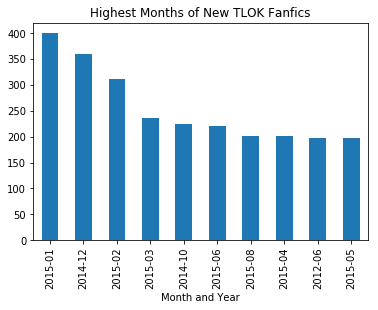

In [12]:
#creating a visualization of the most popular published months

monthcount = allkorra['month'].value_counts().head(10)
print(monthcount)

monthCountGraph = monthcount.plot.bar()
monthCountGraph = plt.title('Highest Months of New TLOK Fanfics')
monthCountGraph = plt.xlabel('Month and Year')
monthCountGraph = plt.xlabel('Month and Year')